## Add loom files (for RNA velocity) file to endothelia subset

In [1]:
import scanpy as sc
import scvelo as scv
import anndata
import loompy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

Running Scanpy 1.8.2, on 2022-01-24 17:48.


In [2]:
## path variable:
adata_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/subsets/211201_endothelia_subset_NIKLAS_annotated.h5ad'
loom_dir = '/home/niklas/data/220107_Human_PCLS_ASK_joint/loom_files/220124_ASK_joint_NIKLAS.loom'

In [3]:
## load adata
adata = sc.read(adata_dir)
## explore meta data of adata object
adata

AnnData object with n_obs × n_vars = 16513 × 15662
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.2', 'auto_cell_type', 'VE Peribronchial_score', 'VE Capillary A_score', 'VE Capillary B_score', 'VE Arterial_score', 'VE Venous_score', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'auto_cell_type_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.2', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sub_leiden_2.2_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_um

In [4]:
## load loom file
ldata = sc.read(loom_dir, cache=True)
ldata

... reading from cache file cache/home-niklas-data-220107_Human_PCLS_ASK_joint-loom_files-220124_ASK_joint_NIKLAS.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 115133 × 20613
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

### Check and reformat barcodes of loom file

In [5]:
## F7C8I == muc31175
## 046ZX == muc31176
## 6SSP5 == muc31177
## 6QJSU == muc31178
## TEFKV == muc31184
## 2A117 == muc31185

In [6]:
## check out 'nomenclature' of barcodes
ldata.obs_names[:10]

Index(['possorted_genome_bam_XN4J0:AATAGAGCATCGAAGGx',
       'possorted_genome_bam_XN4J0:AACGGGATCCGTGGCAx',
       'possorted_genome_bam_XN4J0:AAAGAACAGGGCAGTTx',
       'possorted_genome_bam_XN4J0:AAAGGGCGTAACCAGGx',
       'possorted_genome_bam_XN4J0:AACCACAGTACTGAGGx',
       'possorted_genome_bam_XN4J0:AAGTTCGAGACTTCACx',
       'possorted_genome_bam_XN4J0:AACGGGAGTGAGATCGx',
       'possorted_genome_bam_XN4J0:AAGCATCAGAAGTGTTx',
       'possorted_genome_bam_XN4J0:AAGGTAAGTGTCCACGx',
       'possorted_genome_bam_XN4J0:AAGTGAACAGCTACATx'],
      dtype='object', name='CellID')

In [7]:
## check out 'nomenclature' of barcodes
ldata.obs_names[-10::]

Index(['possorted_genome_bam_2A117:TTTGGAGGTTCTTCATx',
       'possorted_genome_bam_2A117:TTTGTTGGTCACGTGCx',
       'possorted_genome_bam_2A117:TTTGTTGCAATACGAAx',
       'possorted_genome_bam_2A117:TTTGTTGAGCGCCTACx',
       'possorted_genome_bam_2A117:TTTGGTTCACGAGGTAx',
       'possorted_genome_bam_2A117:TTTGTTGAGGCGCTCTx',
       'possorted_genome_bam_2A117:TTTGTTGAGCATTGTCx',
       'possorted_genome_bam_2A117:TTTGGAGCAAGTCATCx',
       'possorted_genome_bam_2A117:TTTGGTTGTATCTCTTx',
       'possorted_genome_bam_2A117:TTTGGTTCATAGCACTx'],
      dtype='object', name='CellID')

In [8]:
cell = 'possorted_genome_bam_XN4J0:AATAGAGCATCGAAGGx'
cell.replace('possorted_genome_bam_XN4J0:', 'muc24271_').replace('x','')

'muc24271_AATAGAGCATCGAAGG'

In [9]:
## F7C8I == muc31175
## 046ZX == muc31176
## 6SSP5 == muc31177
## 6QJSU == muc31178
## TEFKV == muc31184
## 2A117 == muc31185

In [10]:
## apply to ldata
ldata.obs_names = [cell.replace('possorted_genome_bam_XN4J0:', 'muc24271_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_SF6U7:', 'muc24276_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_MPRKN:', 'muc24273_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_I6YWA:', 'muc24279_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_X5YKC:', 'muc24274_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_QN9W7:', 'muc24275_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_M5F1Z:', 'muc24280_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_8GZVO:', 'muc24272_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_F7C8I:', 'muc31175_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_046ZX:', 'muc31176_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_6SSP5:', 'muc31177_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_6QJSU:', 'muc31178_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_TEFKV:', 'muc31184_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('possorted_genome_bam_2A117:', 'muc31185_') for cell in ldata.obs_names]
ldata.obs_names = [cell.replace('x','') for cell in ldata.obs_names]
ldata.obs_names[:10]

Index(['muc24271_AATAGAGCATCGAAGG', 'muc24271_AACGGGATCCGTGGCA',
       'muc24271_AAAGAACAGGGCAGTT', 'muc24271_AAAGGGCGTAACCAGG',
       'muc24271_AACCACAGTACTGAGG', 'muc24271_AAGTTCGAGACTTCAC',
       'muc24271_AACGGGAGTGAGATCG', 'muc24271_AAGCATCAGAAGTGTT',
       'muc24271_AAGGTAAGTGTCCACG', 'muc24271_AAGTGAACAGCTACAT'],
      dtype='object')

In [11]:
## make obs and var names unique
ldata.var_names_make_unique()
ldata.obs_names_make_unique() 

In [12]:
## check whether they still adhere to the same 'nomenclature'
ldata.obs_names[:10]

Index(['muc24271_AATAGAGCATCGAAGG', 'muc24271_AACGGGATCCGTGGCA',
       'muc24271_AAAGAACAGGGCAGTT', 'muc24271_AAAGGGCGTAACCAGG',
       'muc24271_AACCACAGTACTGAGG', 'muc24271_AAGTTCGAGACTTCAC',
       'muc24271_AACGGGAGTGAGATCG', 'muc24271_AAGCATCAGAAGTGTT',
       'muc24271_AAGGTAAGTGTCCACG', 'muc24271_AAGTGAACAGCTACAT'],
      dtype='object')

In [13]:
## check whether they still adhere to the same 'nomenclature'
ldata.obs_names[-10::]

Index(['muc31185_TTTGGAGGTTCTTCAT', 'muc31185_TTTGTTGGTCACGTGC',
       'muc31185_TTTGTTGCAATACGAA', 'muc31185_TTTGTTGAGCGCCTAC',
       'muc31185_TTTGGTTCACGAGGTA', 'muc31185_TTTGTTGAGGCGCTCT',
       'muc31185_TTTGTTGAGCATTGTC', 'muc31185_TTTGGAGCAAGTCATC',
       'muc31185_TTTGGTTGTATCTCTT', 'muc31185_TTTGGTTCATAGCACT'],
      dtype='object')

### Check and reformat barcodes of adata

In [14]:
adata.obs.identifier.cat.categories

Index(['muc24271', 'muc24272', 'muc24273', 'muc24275', 'muc24279', 'muc31175',
       'muc31176', 'muc31177', 'muc31178', 'muc31185'],
      dtype='object')

In [15]:
## check out 'nomenclature' of barcodes
adata.obs_names[:10]

Index(['muc31175_AAACCCAAGTAAAGCT', 'muc31175_AAACCCACATTAGGAA',
       'muc31175_AAACCCATCATGACAC', 'muc31175_AAACCCATCGCACGGT',
       'muc31175_AAACGAATCAGCCCAG', 'muc31175_AAACGAATCGCTAGCG',
       'muc31175_AAACGAATCTCCACTG', 'muc31175_AAACGCTAGCGTATAA',
       'muc31175_AAACGCTCATTGGGAG', 'muc31175_AAACGCTGTCCTGAAT'],
      dtype='object')

In [16]:
## check out 'nomenclature' of barcodes
adata.obs_names[-10::]

Index(['muc24279_TTGGGTAGTTGGGTTT', 'muc24279_TTGGTTTTCCCTCTTT',
       'muc24279_TTTACGTGTTTCGTTT', 'muc24279_TTTAGTCGTATAGGGC',
       'muc24279_TTTCATGCATCTATCT', 'muc24279_TTTCATGCATTCTTCA',
       'muc24279_TTTCGATTCGTTATCT', 'muc24279_TTTGACTTCGAAGAAT',
       'muc24279_TTTGATCGTTAGTCGT', 'muc24279_TTTGTTGTCGATACGT'],
      dtype='object')

In [17]:
## make obs and var names unique
adata.var_names_make_unique()
adata.obs_names_make_unique() 

In [18]:
## check whether they still adhere to the same 'nomenclature'
adata.obs_names[:10]

Index(['muc31175_AAACCCAAGTAAAGCT', 'muc31175_AAACCCACATTAGGAA',
       'muc31175_AAACCCATCATGACAC', 'muc31175_AAACCCATCGCACGGT',
       'muc31175_AAACGAATCAGCCCAG', 'muc31175_AAACGAATCGCTAGCG',
       'muc31175_AAACGAATCTCCACTG', 'muc31175_AAACGCTAGCGTATAA',
       'muc31175_AAACGCTCATTGGGAG', 'muc31175_AAACGCTGTCCTGAAT'],
      dtype='object')

In [19]:
## check whether they still adhere to the same 'nomenclature'
adata.obs_names[-10::]

Index(['muc24279_TTGGGTAGTTGGGTTT', 'muc24279_TTGGTTTTCCCTCTTT',
       'muc24279_TTTACGTGTTTCGTTT', 'muc24279_TTTAGTCGTATAGGGC',
       'muc24279_TTTCATGCATCTATCT', 'muc24279_TTTCATGCATTCTTCA',
       'muc24279_TTTCGATTCGTTATCT', 'muc24279_TTTGACTTCGAAGAAT',
       'muc24279_TTTGATCGTTAGTCGT', 'muc24279_TTTGTTGTCGATACGT'],
      dtype='object')

### Check for non-overlapping cells

In [20]:
## only loose 0 cells :)))
print(len(ldata.obs_names))
print(len(adata.obs_names))

len(np.intersect1d(adata.obs_names, ldata.obs_names))

115133
16513


16513

### Add loom layers (spliced/unspliced counts) with scVelo's scv.utils.merge(adata, ldata)

In [21]:
adata = scv.utils.merge(adata, ldata)
adata

AnnData object with n_obs × n_vars = 16513 × 15662
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.2', 'auto_cell_type', 'VE Peribronchial_score', 'VE Capillary A_score', 'VE Capillary B_score', 'VE Arterial_score', 'VE Venous_score', 'cell_type', 'cell_type_group', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'auto_cell_type_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.2', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'pa

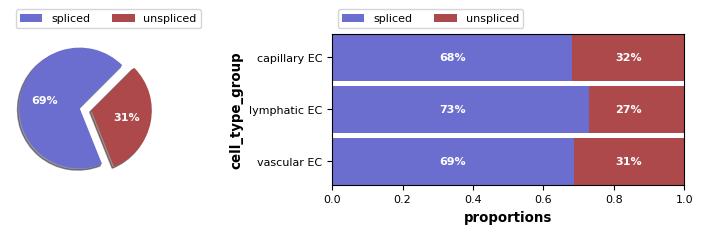

In [22]:
scv.pl.proportions(adata, groupby = 'cell_type_group',  layers = ['spliced', 'unspliced'])

In [23]:
print(type(adata.layers['counts']))
print(type(adata.layers['matrix']))
print(type(adata.layers['ambiguous']))
print(type(adata.layers['spliced']))
print(type(adata.layers['unspliced']))

<class 'anndata._core.views.SparseCSRView'>
<class 'anndata._core.views.SparseCSRView'>
<class 'anndata._core.views.SparseCSRView'>
<class 'anndata._core.views.SparseCSRView'>
<class 'anndata._core.views.SparseCSRView'>


In [24]:
## Save this adata with loom info merged on top
adata.write('/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/subsets/211201_endothelia_subset_NIKLAS_annotated_LOOM.h5ad')